<a href="https://colab.research.google.com/github/oliverquintana/DeepLearningTensorFlow/blob/master/Copy_of_TumorCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2

path_images = '/content/drive/My Drive/Dataset MRI/tumor_images'
path_masks = '/content/drive/My Drive/Dataset MRI/tumor_masks'
path_images_val = '/content/drive/My Drive/Dataset MRI/tumor_images_val/'
path_masks_val = '/content/drive/My Drive/Dataset MRI/tumor_masks_val/'

def get_images(mypath):
    onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
    onlyfiles.sort()
    images = np.empty(len(onlyfiles), dtype=object)
    images = np.zeros((len(onlyfiles),256,256))
    print(len(onlyfiles))
    for n in range(len(onlyfiles)):
        images[n] = cv2.imread( join(mypath,onlyfiles[n]), 0)

    return images

def get_labels(array):
    labels = []
    for i in array:
        if np.max(i) > 0:
            labels.append(1)
        else:
            labels.append(0)
    
    return np.array(labels)

In [0]:
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2

path_images = '/content/drive/My Drive/Dataset MRI/tumor_images/'
path_masks = '/content/drive/My Drive/Dataset MRI/tumor_masks'

def get_images(mypath):
    onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
    onlyfiles.sort()
    images = np.empty(len(onlyfiles), dtype=object)
    images = np.zeros((len(onlyfiles),256,256))
    #print(len(onlyfiles))
    for n in range(len(onlyfiles)):
        temp = str(onlyfiles[n])
        if temp.endswith(".tif"):
            print(temp)
        images[n] = cv2.imread( join(mypath,onlyfiles[n]), 0)

    return

def get_labels(array):
    labels = []
    for i in array:
        if np.max(i) > 0:
            labels.append(1)
        else:
            labels.append(0)
    
    return np.array(labels)

In [106]:
#print(get_images(path_images))
#get_images(path_images)
training_images = get_images(path_images)
training_images = training_images[0:22]
training_masks = get_images(path_masks)
training_masks = training_masks[0:22]
training_labels = get_labels(training_masks)
training_labels = training_labels[0:22]
validation_images = get_images(path_images_val)
validation_masks = get_images(path_masks_val)
validation_labels = get_labels(validation_masks)

63
63
20
20


In [107]:
print(validation_images.shape)
print(validation_masks.shape)

(20, 256, 256)
(20, 256, 256)


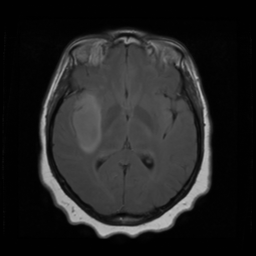

1


In [109]:
from google.colab.patches import cv2_imshow
cv2_imshow(training_images[9])

training_labels = get_labels(training_masks)
print(training_labels[9])

In [110]:
training_images_r = training_images.reshape(len(training_images), 256, 256, 1)
validation_images_r = validation_images.reshape(len(validation_images), 256, 256, 1)
print(training_labels.shape)
print(training_images.shape)
#training_labels = training_labels.reshape(len(training_labels), 65536,1)

(22,)
(22, 256, 256)


In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (5,5), activation = 'relu', input_shape = (256, 256, 1)),
                                    tf.keras.layers.MaxPooling2D(3,3),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.Dense(32, activation = 'relu'),
                                    tf.keras.layers.Dense(16, activation = 'relu'),
                                    tf.keras.layers.Dense(4, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'softmax')
                                    ])

In [112]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images_r, training_labels, epochs=5)

Train on 22 samples
Epoch 1/5
22/22 [==============================] - 0s 15ms/sample - loss: nan - acc: 0.2727
Epoch 2/5
22/22 [==============================] - 0s 1ms/sample - loss: nan - acc: 0.7273
Epoch 3/5
22/22 [==============================] - 0s 1ms/sample - loss: nan - acc: 0.7273
Epoch 4/5
22/22 [==============================] - 0s 1ms/sample - loss: nan - acc: 0.7273
Epoch 5/5
22/22 [==============================] - 0s 1ms/sample - loss: nan - acc: 0.7273


In [113]:
model.evaluate(validation_images_r, validation_labels)

20/20 [==============================] - 0s 13ms/sample - loss: nan - acc: 0.6000


[nan, 0.6]